# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_response
btc_price = btc_response['data']['1']['quotes']['USD']['price']
btc_price

18442.53

In [6]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_price

544.66

In [7]:
# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22131.04
The current value of your 5.3 ETH is $2886.70


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-11-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio= alpaca.get_barset(
    tickers,
    timeframe,
    start= today,
    end=today
).df


# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-11-18 00:00:00-05:00  117.95  117.99  117.89  117.965  4880892  360.91   

                                                            
                            high     low   close    volume  
2020-11-18 00:00:00-05:00  361.5  356.24  356.29  57605438

In [11]:
# Pick AGG and SPY close prices
agg_close_price= float(df_portfolio["AGG"]["close"])
spy_close_price= float (df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.965
Current SPY closing price: $356.29


In [12]:
# Compute the current value of shares
my_spy_value=my_spy * spy_close_price
my_agg_value= my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17814.50
The current value of your 200 AGG shares is $23593.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
value_data = [my_btc_value + my_eth_value, my_agg_value + my_spy_value]
df_savings = pd.DataFrame(value_data, index=["crypto","shares"],columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,25017.734
shares,41407.500


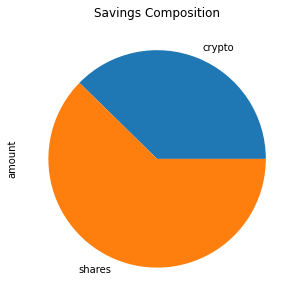

In [14]:
# Plot savings pie chart
df_savings.plot(kind="pie", figsize=(5,5), y="amount", legend = False, title = "Savings Composition")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
savings = df_savings.sum().values[0]
print(savings)
savings_required = emergency_fund - savings 

# Validate saving health
if savings > emergency_fund:
    print("Congratulations on having sufficient savings!")
elif savings == emergency_fund:
   print("Congratulations on reaching your savings goal!")
elif savings < emergency_fund:
    print(f"You need ${savings_required} to reach your emergency fund goal.")

36000
66425.234
Congratulations on having sufficient savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-18', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# set tickers
tickers = ["AGG", "SPY"]
# set timeframe
timeframe = "1D"
# get the data
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597.0   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263.0   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587.0   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639.0   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-11-18 00:00:00-05:00  206.04  208.90  205.99  208.71  94448031  
2015-11-19 00:00:00-05:00  208.59  209.05  208.20  208.53  61897641  
2015-11-20 00:00:00-05:00  209.45  210.12  208.86  209.35  67021762  
2015-11-23 00:00:00-05:00  209.38  209.98  208.52  209.06  54738608  
2015-11-24 00:00:00-05:00  207.87  209.83  207.41  209.38  81748691

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30)

In [19]:
# Printing the simulation input data
MC_stock_data.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597.0   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263.0   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587.0   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639.0   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-11-18 00:00:00-05:00          NaN  206.04  208.90  205.99  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.20  208.53   
2015-11-20 00:00:00-05:00    -0.000552  209.45  210.12  208.86  209.35   
2015-11-23 00:00:00-05:00     0.000552  209.38  209.98  208.52  209.06   
2015-11-24 00:00:00-05:00     0.000460  207.87  209.83  207.41  209.38   

                                                  
                             volume daily_return  
2015-11-18 00:00:00-05:00  94448031          NaN  
2015-11-19 00:00:00-05:00  61897641    -0.000862  
2015-11-20 00:00:00-05:00  67021762     0.003932  
2015-11-23 00:00:00-05:00  54738608    -0.001385  
2015-11-24 00:00:00-05:00  81748691     0.001531

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012015,1.006589,1.006657,1.008195,1.005064,0.991413,0.989168,1.003406,0.998362,1.009657,...,0.994128,1.006294,0.992817,1.009178,1.001312,1.004148,1.010329,0.990615,0.993390,0.999402
2,1.019666,1.005276,1.007972,1.005481,0.992855,1.001538,1.010138,1.005391,0.993410,0.997634,...,0.996940,1.009899,0.986521,1.004080,0.997449,1.000230,1.030850,0.998170,0.988042,1.003880
3,1.017233,1.012182,1.011848,1.012268,1.001758,1.007387,1.014126,1.004488,0.999841,0.996419,...,1.001356,1.020516,0.986224,1.002650,0.993727,0.996779,1.039553,0.998039,1.012666,1.000035
4,1.014044,1.014963,1.013961,1.015420,0.994718,1.008846,1.020336,0.993446,0.995874,0.994005,...,1.008056,1.009340,0.995083,1.004882,0.983742,0.996084,1.043410,0.990842,1.025012,1.010681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.551701,9.091459,55.659008,10.543770,15.253494,6.202861,14.767171,16.937157,33.487698,7.319220,...,5.011238,36.400827,11.224562,5.235576,7.729727,3.155316,22.137582,25.338480,7.507209,17.744017
7557,16.439497,9.185804,55.581951,10.694605,15.266477,6.228561,14.753793,16.895670,33.392179,7.301988,...,5.025761,35.970807,11.464371,5.174888,7.735347,3.133795,21.871950,25.328570,7.527155,17.955509
7558,16.117914,9.107521,55.894792,10.674577,15.279244,6.218406,14.856835,16.930850,32.969692,7.303872,...,5.033558,36.068317,11.468059,5.186189,7.766703,3.110529,21.974525,25.297631,7.591198,17.878877
7559,16.107373,8.953815,55.850193,10.761132,15.538440,6.289416,15.002806,16.844814,32.904050,7.284122,...,5.025848,36.629639,11.481212,5.235740,7.785387,3.083258,22.181273,25.477524,7.595341,17.767755


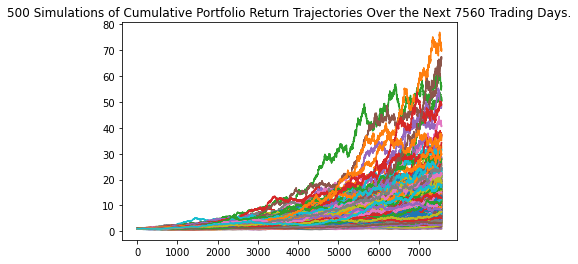

In [21]:
# Plot simulation outcomes
line_plot= MC_stock_data.plot_simulation()

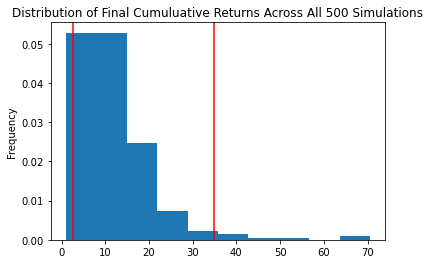

In [22]:
# Plot probability distribution and confidence intervals
dist_plot=MC_stock_data.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl= MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.062755
std               8.906762
min               0.977821
25%               6.233939
50%              10.288715
75%              15.163829
max              70.604153
95% CI Lower      2.701423
95% CI Upper     34.976510
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54028.45 and $699530.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81042.68 and $1049295.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#re-running with 5 year window, 80% weight in stocks, 20% in bonds
MC_stock_data= MCSimulation(
     portfolio_data= df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_stock_data.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597.0   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263.0   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587.0   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639.0   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-11-18 00:00:00-05:00          NaN  206.04  208.90  205.99  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.20  208.53   
2015-11-20 00:00:00-05:00    -0.000552  209.45  210.12  208.86  209.35   
2015-11-23 00:00:00-05:00     0.000552  209.38  209.98  208.52  209.06   
2015-11-24 00:00:00-05:00     0.000460  207.87  209.83  207.41  209.38   

                                                  
                             volume daily_return  
2015-11-18 00:00:00-05:00  94448031          NaN  
2015-11-19 00:00:00-05:00  61897641    -0.000862  
2015-11-20 00:00:00-05:00  67021762     0.003932  
2015-11-23 00:00:00-05:00  54738608    -0.001385  
2015-11-24 00:00:00-05:00  81748691     0.001531

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988436,1.002207,0.999099,0.990596,1.010533,0.992700,1.018016,1.001852,1.013541,1.016334,...,0.997395,1.010147,0.998685,1.023601,0.991718,1.017461,1.001552,0.983986,0.991539,0.996389
2,0.965383,1.001749,0.995273,0.996910,1.004074,0.994089,1.021458,0.999774,1.031620,1.003729,...,0.992597,1.011867,0.989944,1.020435,1.005844,1.031139,1.002191,0.984634,0.990579,0.997474
3,0.958402,0.989095,0.991515,1.001084,1.013334,0.992580,1.026701,0.993219,1.019608,1.001750,...,0.982072,1.022008,0.975155,1.049461,1.003586,1.026348,1.005391,0.983155,1.001215,0.995556
4,0.956401,0.994763,0.996613,1.001053,1.020100,0.982538,1.029871,0.985131,1.024660,0.998520,...,1.004035,1.025838,0.981002,1.056239,0.987746,1.032880,1.001558,1.003626,1.002601,0.981344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.381841,2.173546,1.436889,1.721050,1.100189,1.416835,1.819490,1.637420,1.980467,0.993692,...,0.624064,1.903829,1.295733,1.488484,1.169847,1.305327,1.428572,3.062861,1.426771,1.285120
1257,1.386156,2.156827,1.421067,1.706517,1.088821,1.417399,1.830666,1.606345,1.971036,0.990217,...,0.619931,1.893140,1.265262,1.508533,1.164175,1.318793,1.448195,3.101163,1.426525,1.278819
1258,1.382526,2.158798,1.420158,1.702649,1.093838,1.436866,1.821927,1.610249,1.950740,0.995447,...,0.613869,1.888619,1.251361,1.484378,1.170290,1.312296,1.436082,3.102300,1.416085,1.284722
1259,1.368260,2.171446,1.439049,1.685751,1.081215,1.471614,1.855712,1.619201,1.967209,0.983944,...,0.618530,1.892066,1.246383,1.484040,1.172924,1.298715,1.416954,3.048382,1.396081,1.282642


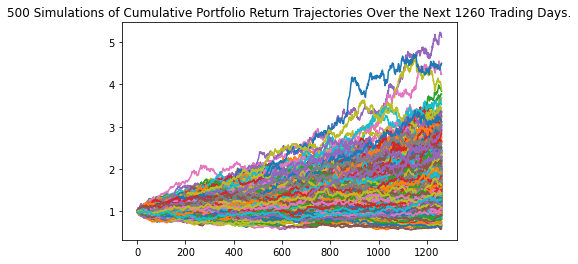

In [28]:
# Plot simulation outcomes
line_plot= MC_stock_data.plot_simulation()

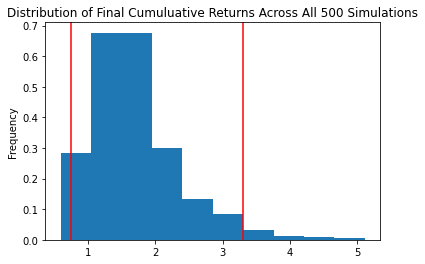

In [29]:
# Plot probability distribution and confidence intervals
dist_plot=MC_stock_data.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_year = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl_five_year)

count           500.000000
mean              1.689733
std               0.644818
min               0.590534
25%               1.278842
50%               1.567000
75%               1.972500
max               5.113743
95% CI Lower      0.748004
95% CI Upper      3.303914
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five_year = round(tbl[8]*initial_investment_5,2)
ci_upper_five_year = round(tbl[9]*initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_year} and ${ci_upper_five_year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $162085.35 and $2098590.62


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
#back to a 60% weight of stock, but larger initial investment, 10 years
MC_stock_data= MCSimulation(
     portfolio_data= df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997057,1.003703,0.992839,1.010580,1.013756,1.008412,0.998771,0.990966,1.009514,0.999243,...,1.005020,0.991487,0.998319,0.989368,0.999299,0.999448,1.003359,0.995362,1.004313,0.998261
2,0.993171,1.005649,0.985265,1.005482,1.010480,1.008098,1.008472,1.004570,1.001925,0.997553,...,1.003238,0.996112,0.989141,0.996335,1.004844,1.003998,0.992802,1.006606,0.994249,0.997971
3,0.996861,1.006304,0.973789,1.001207,1.013550,1.010128,1.008213,1.004418,0.996936,0.991131,...,1.012891,0.996360,0.989948,0.998708,1.008734,0.994408,1.007883,1.007956,0.991638,1.000574
4,0.990220,1.008965,0.974010,1.007048,1.017022,1.006781,1.013211,1.003970,1.000222,0.986726,...,1.022232,1.008248,0.981413,0.999568,1.017241,0.989623,1.004773,1.021186,0.991308,0.999499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.670644,3.228863,0.874229,0.960060,2.468089,3.894979,2.336543,2.928090,2.548581,2.202722,...,1.869830,2.204958,3.989834,3.350667,2.998020,2.846098,1.643679,1.320126,1.840788,3.438175
2517,1.666286,3.243708,0.868519,0.950621,2.495030,3.850751,2.329499,2.927705,2.536346,2.186927,...,1.873134,2.224569,4.011466,3.414251,3.010606,2.834493,1.643169,1.318588,1.852171,3.452358
2518,1.673747,3.276816,0.869178,0.966683,2.489445,3.847545,2.357145,2.953143,2.535648,2.167719,...,1.863492,2.233818,3.976500,3.400395,3.022402,2.833484,1.620589,1.310764,1.864824,3.473511
2519,1.681110,3.281498,0.870117,0.967297,2.456856,3.842781,2.362579,2.977423,2.554253,2.144469,...,1.869526,2.255841,3.936533,3.393265,3.043074,2.855066,1.630071,1.307784,1.853882,3.426571


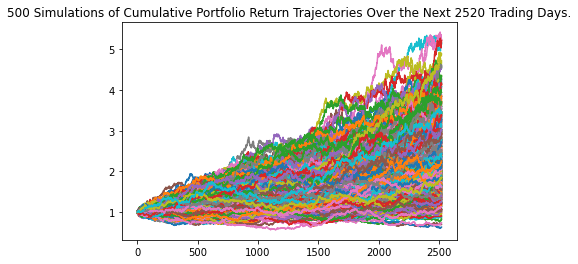

In [34]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

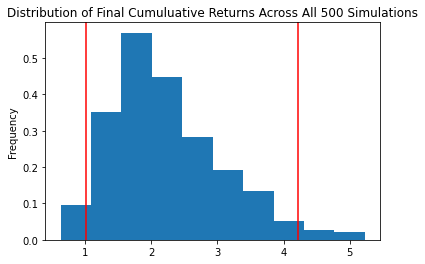

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten_year = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten_year)

count           500.000000
mean              2.239544
std               0.844024
min               0.631838
25%               1.620334
50%               2.062826
75%               2.741144
max               5.227852
95% CI Lower      1.024013
95% CI Upper      4.212700
Name: 2520, dtype: float64


In [38]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_year = round(tbl[8]*initial_investment_10,2)
ci_upper_ten_year = round(tbl[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_year} and ${ci_upper_ten_year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $162085.35 and $2098590.62
